In [1]:
using DrWatson
@quickactivate "RR-MAR"

In [2]:
using TensorToolbox, CommonFeatures, JLD2, LinearAlgebra, Statistics, Plots, Latexify, Dates

[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a] (cache misses: wrong dep version loaded (6))


In [3]:
matdata = load(datadir("globaldata.jld2"), "matdata");
maxiter = 500;
tucketa = 1e-03;
ϵ = 1e-03;
p = 1;

In [4]:
# Note that there is a difference of 0.01 in BIC between [3,1,4,2] and [3,1,4,3]. I choose [3,1,4,3]
cendata = matdata .- mean(matdata, dims = 3);
tuckest = tuckerreg(cendata, [3,1,4,3]; eta = tucketa, maxiter, p, ϵ);

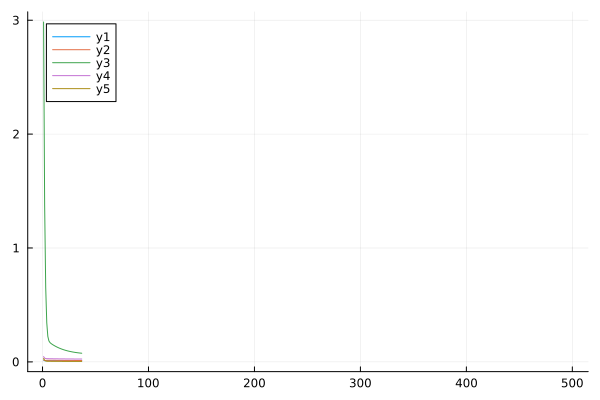

In [5]:
plot(tuckest.fullgrads)

# SCCF

In [10]:
tmp = nullspace(tuckest.U[4]')
tmp * inv(tmp[1:2, 1:2])

5×2 Matrix{Float64}:
  1.0            7.204e-17
  1.80677e-17    1.0
 -0.406829      -2.06015
 -0.705038       1.64888
 -1.45226      -11.1991

In [6]:
δ = nullspace(tuckest.U[1]')

4×1 Matrix{Float64}:
  5.2428452643820646e-5
  0.9427115588852928
 -0.3140396143939234
  0.11257901485905092

In [7]:
gdp = round.(δ * inv(δ[2]), digits = 4)

4×1 Matrix{Float64}:
  0.0001
  1.0
 -0.3331
  0.1194

GDP is approximately 1/3 of PROD.

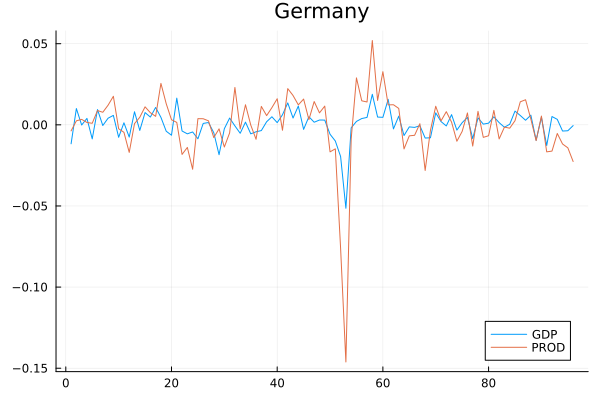

In [8]:
plot(cendata[2, 3,:], label="GDP", title="Germany")
plot!(cendata[3, 3,:], label="PROD")

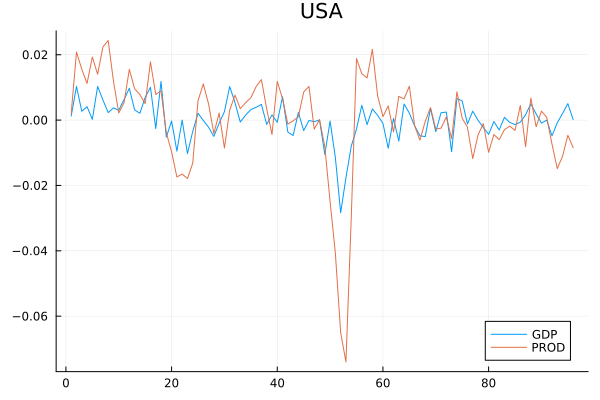

In [9]:
plot(cendata[2, 1,:], label="GDP", title="USA")
plot!(cendata[3, 1,:], label="PROD")

- Countries go in the following order:
- USA, CAN, DEU, FRA, GBR
- Economic Indicators go in the following order:
- ir, GDP, prod, CPI

In [10]:
γ = nullspace(tuckest.U[2]')

5×4 Matrix{Float64}:
 -0.453899  -0.397969  -0.424788  -0.411527
  0.865747  -0.11771   -0.125642  -0.12172
 -0.11771    0.896795  -0.110161  -0.106721
 -0.125642  -0.110161   0.882415  -0.113914
 -0.12172   -0.106721  -0.113914   0.889643

Leaving USA unrestricted

In [11]:
usa = round.(γ * inv(γ[[2,3,4,5], 1:4]), digits = 2)

5×4 Matrix{Float64}:
 -0.85  -0.74  -0.79  -0.77
  1.0   -0.0    0.0    0.0
 -0.0    1.0    0.0   -0.0
  0.0   -0.0    1.0   -0.0
  0.0   -0.0    0.0    1.0

In [30]:
gg = usa[1,:]
kron(gdp', gg)

4×4 Matrix{Float64}:
 -8.5e-5  -0.85  0.283135  -0.10149
 -7.4e-5  -0.74  0.246494  -0.088356
 -7.9e-5  -0.79  0.263149  -0.094326
 -7.7e-5  -0.77  0.256487  -0.091938

Overall, it seems all countries move together

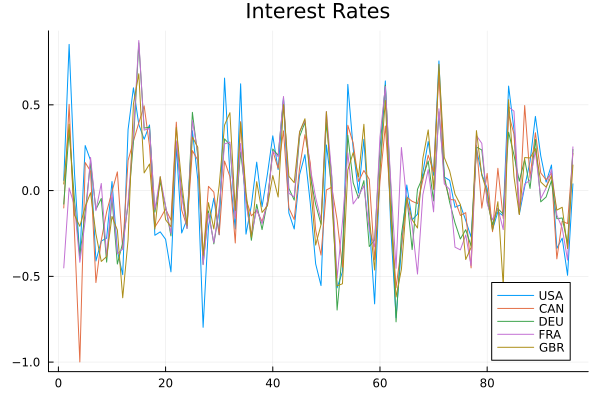

In [12]:
econind = 1
plot(cendata[econind, 1,:], label="USA", title = "Interest Rates")
plot!(cendata[econind, 2,:], label="CAN")
plot!(cendata[econind, 3,:], label="DEU")
plot!(cendata[econind, 4,:], label="FRA")
plot!(cendata[econind, 5,:], label="GBR")

## Joint Indicator and Country Co-movements

In [29]:
print(latexify(round.(kron(gdp', usa'), digits = 4)))

\begin{equation}
\left[
\begin{array}{cccccccccccccccccccc}
-0.0001 & 0.0001 & -0.0 & 0.0 & 0.0 & -0.85 & 1.0 & -0.0 & 0.0 & 0.0 & 0.2831 & -0.3331 & 0.0 & -0.0 & -0.0 & -0.1015 & 0.1194 & -0.0 & 0.0 & 0.0 \\
-0.0001 & -0.0 & 0.0001 & -0.0 & -0.0 & -0.74 & -0.0 & 1.0 & -0.0 & -0.0 & 0.2465 & 0.0 & -0.3331 & 0.0 & 0.0 & -0.0884 & -0.0 & 0.1194 & -0.0 & -0.0 \\
-0.0001 & 0.0 & 0.0 & 0.0001 & 0.0 & -0.79 & 0.0 & 0.0 & 1.0 & 0.0 & 0.2631 & -0.0 & -0.0 & -0.3331 & -0.0 & -0.0943 & 0.0 & 0.0 & 0.1194 & 0.0 \\
-0.0001 & 0.0 & -0.0 & -0.0 & 0.0001 & -0.77 & 0.0 & -0.0 & -0.0 & 1.0 & 0.2565 & -0.0 & 0.0 & 0.0 & -0.3331 & -0.0919 & 0.0 & -0.0 & -0.0 & 0.1194 \\
\end{array}
\right]
\end{equation}


---------

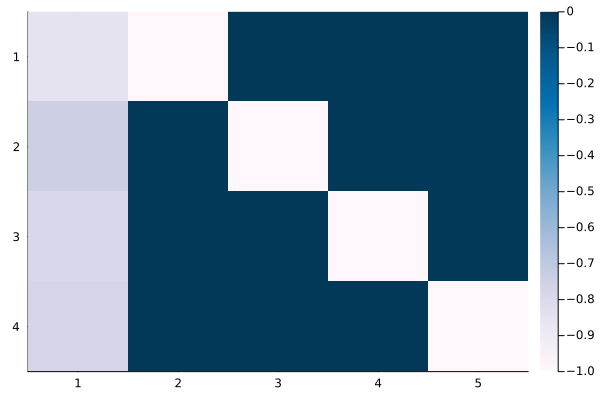

In [44]:
comb = kron(gdp', usa')
heatmap(10000 .* [comb[:, 1] -comb[:, 2:5]], yflip = true, color = :PuBu)